In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
nba = pd.read_csv('nba_stats.csv')

In [3]:
print(f'Position counts :: {nba['Pos'].value_counts()}')

Position counts :: Pos
SG    192
PF    179
PG    166
SF    160
C     158
Name: count, dtype: int64


In [4]:
positional_mapping = {position: index for index, position in enumerate(nba['Pos'].unique())}

In [5]:
nba['Pos'] = nba['Pos'].map(positional_mapping)

In [6]:
target = nba['Pos']


In [7]:
train = nba.drop(columns=['Pos', 'Age', 'Tm', 'FG%', '3P%', '2P%', 'FT%'])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.2, random_state=0, stratify=target)

In [9]:
X_train.head()

,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
225,81,60,28.2,4.4,10.3,0.1,0.4,4.3,9.9,0.435,...,3.3,2.1,8.1,10.2,1.8,0.7,0.4,1.8,3.0,11.3
92,55,2,14.8,2.2,4.4,0.3,0.9,1.9,3.5,0.541,...,1.7,0.3,1.5,1.7,1.1,0.4,0.1,1.0,1.9,6.0
529,28,1,19.0,1.5,4.3,1.0,3.2,0.5,1.1,0.479,...,0.4,0.4,1.9,2.3,0.9,0.6,0.2,0.5,1.6,4.4
395,77,77,33.7,4.6,6.6,0.0,0.0,4.6,6.6,0.703,...,8.0,3.5,10.3,13.8,1.2,0.7,2.3,1.4,2.7,12.7
527,47,18,23.3,5.2,10.7,0.0,0.0,5.2,10.7,0.485,...,2.4,1.2,5.2,6.4,1.5,0.6,0.9,0.7,2.5,12.0


In [10]:
Y_train.head()

225    0
92     4
529    0
395    2
527    2
Name: Pos, dtype: int64

In [11]:
X_train.shape

(684, 21)

In [12]:
X_test.shape

(171, 21)

In [13]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

In [14]:
Y_train_predict = tree.predict(X_train)
Y_test_predict = tree.predict(X_test)

In [15]:
print(f'Training Score :: {tree.score(X_train, Y_train)}')
print(f'Validation Score :: {tree.score(X_test, Y_test)}')


Training Score :: 1.0
Validation Score :: 0.4269005847953216


Overfitting as observed.

In [17]:

# for depth in range(3, 6):
    # for split_size in [5, 10, 15]:
tree_max_depth = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_max_depth.fit(X_train, Y_train)
Y_train_predict = tree_max_depth.predict(X_train)
Y_test_predict = tree_max_depth.predict(X_test)
print(f"Max Depth :: {3}")
print(f'Training Score :: {tree_max_depth.score(X_train, Y_train)}')
print(f'Validation Score :: {tree_max_depth.score(X_test, Y_test)}')


Max Depth :: 3
Training Score :: 0.4824561403508772
Validation Score :: 0.5087719298245614


In [18]:
for name, importance in zip(X_train.columns, tree.feature_importances_):
    print(f"{name}: {importance:.4f}")


G: 0.0478
GS: 0.0571
MP: 0.0249
FG: 0.0102
FGA: 0.0122
3P: 0.0135
3PA: 0.1385
2P: 0.0212
2PA: 0.0344
eFG%: 0.0506
FT: 0.0438
FTA: 0.0261
ORB: 0.0786
DRB: 0.0492
TRB: 0.0871
AST: 0.1344
STL: 0.0228
BLK: 0.0508
TOV: 0.0391
PF: 0.0419
PTS: 0.0158


In [19]:
# confusion matrix
print(pd.crosstab(Y_test, Y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   0   1   2   3   4  All
True                              
0          14   1   6   4  11   36
1           1  22   0   2   8   33
2          10   1  19   1   1   32
3          11   2   0   5  14   32
4           5   4   0   2  27   38
All        41  30  25  14  61  171


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

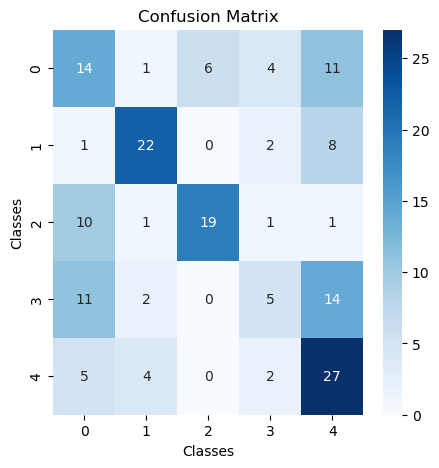

In [79]:
test_confusion_matrix = confusion_matrix(Y_test, Y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree_max_depth.classes_, yticklabels=tree_max_depth.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()

Scale Data -> NO. Since data value ranges don't affect the output of a decision tree, this step can be skipped.


Data Needs to be scaled while using other classification techniques like SVM, KNN or Neural Networks where most of the work is done using distance measures for dot products.

Feature Engineering -> Selecting the most relevant features.

In [21]:
train = nba.drop(columns=['Pos', 'Age', 'Tm', 'G', 'GS', 'MP','3P', '3PA', 'FG', 'FGA', '2P', '2PA', '2P%', 'FT', 'FTA'])

In [22]:
train.columns

Index(['FG%', '3P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.2, random_state=0, stratify=target)

In [24]:
X_train.columns

Index(['FG%', '3P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [25]:
tree_max_depth = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_max_depth.fit(X_train, Y_train)
Y_train_predict = tree_max_depth.predict(X_train)
Y_test_predict = tree_max_depth.predict(X_test)
print(f"Max Depth :: {3}")
print(f'Training Score :: {tree_max_depth.score(X_train, Y_train)}')
print(f'Validation Score :: {tree_max_depth.score(X_test, Y_test)}')

Max Depth :: 3
Training Score :: 0.47368421052631576
Validation Score :: 0.49122807017543857


In [26]:
# confusion matrix
print(pd.crosstab(Y_test, Y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   0   1   2   3   4  All
True                              
0          13   0   8   2  13   36
1           0  20   0   3  10   33
2           8   0  20   1   3   32
3          10   2   3   5  12   32
4           6   3   0   3  26   38
All        37  25  31  14  64  171


In [27]:
for name, importance in zip(X_train.columns, tree.feature_importances_):
    print(f"{name}: {importance:.4f}")


FG%: 0.0478
3P%: 0.0571
eFG%: 0.0249
FT%: 0.0102
ORB: 0.0122
DRB: 0.0135
TRB: 0.1385
AST: 0.0212
STL: 0.0344
BLK: 0.0506
TOV: 0.0438
PF: 0.0261
PTS: 0.0786


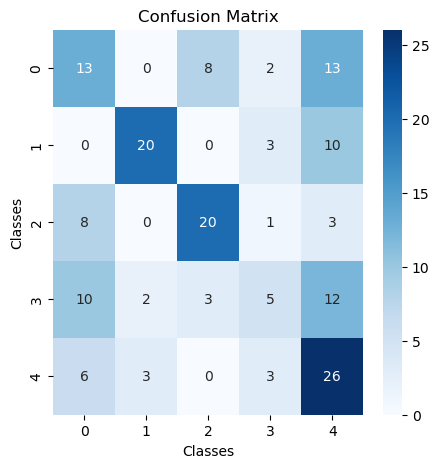

In [28]:
test_confusion_matrix = confusion_matrix(Y_test, Y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree_max_depth.classes_, yticklabels=tree_max_depth.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()

Cross Validation -> Stratified 10-fold cross validation.

Accuracy for this fold: 0.45348837209302323
Confusion Matrix for this fold:


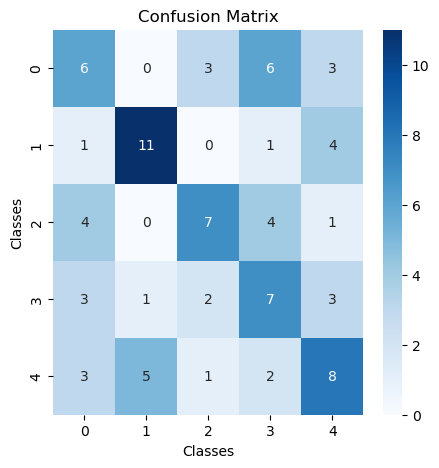

Accuracy for this fold: 0.4418604651162791
Confusion Matrix for this fold:


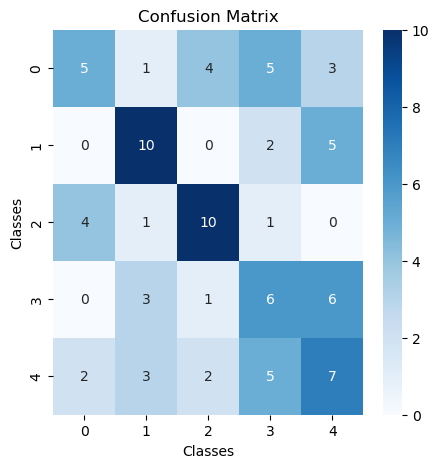

Accuracy for this fold: 0.43023255813953487
Confusion Matrix for this fold:


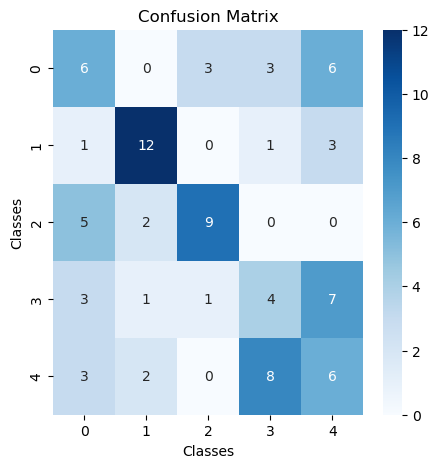

Accuracy for this fold: 0.4883720930232558
Confusion Matrix for this fold:


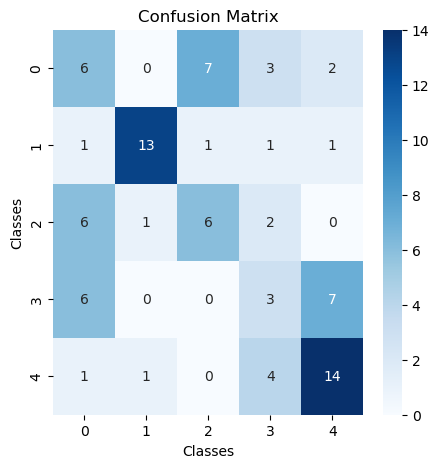

Accuracy for this fold: 0.43023255813953487
Confusion Matrix for this fold:


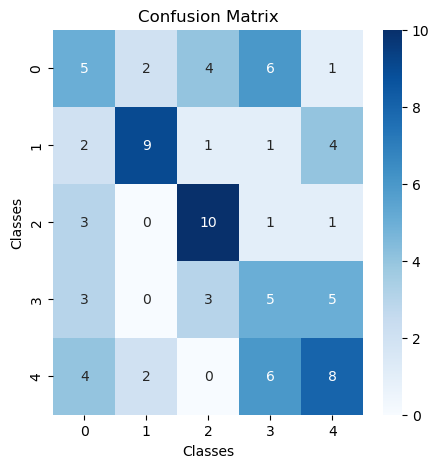

Accuracy for this fold: 0.3764705882352941
Confusion Matrix for this fold:


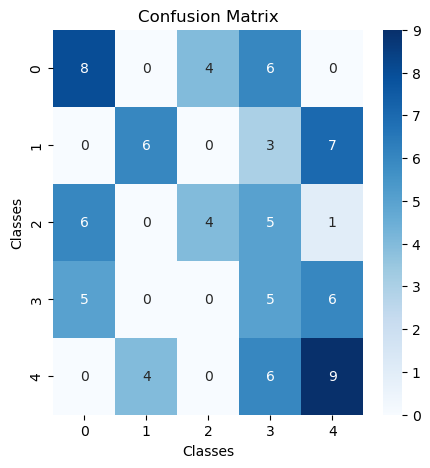

Accuracy for this fold: 0.4588235294117647
Confusion Matrix for this fold:


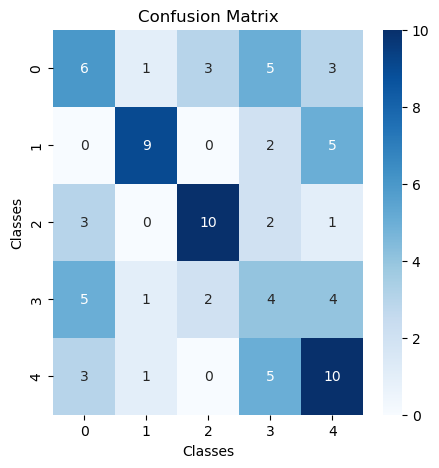

Accuracy for this fold: 0.4588235294117647
Confusion Matrix for this fold:


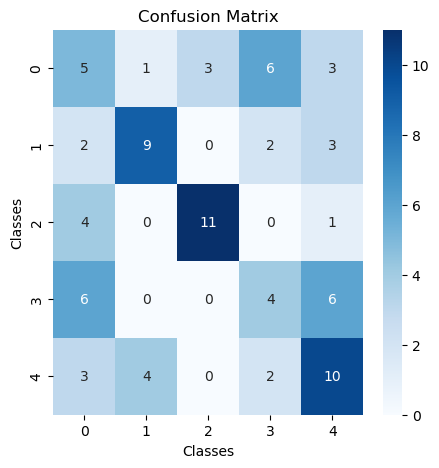

Accuracy for this fold: 0.47058823529411764
Confusion Matrix for this fold:


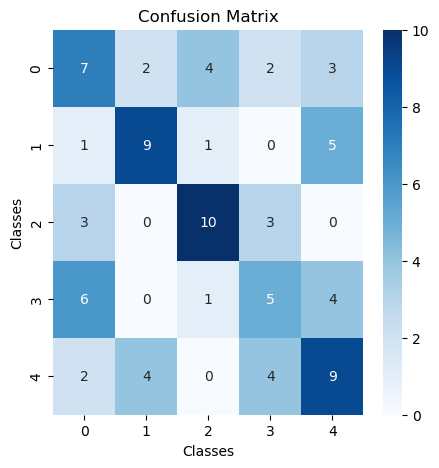

Accuracy for this fold: 0.4588235294117647
Confusion Matrix for this fold:


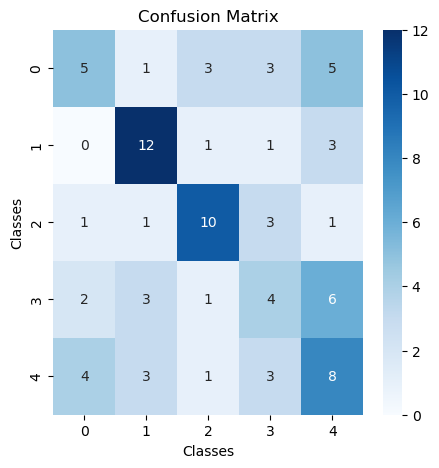


Average Accuracy across all folds: 0.44677154582763345

Average Confusion Matrix across all folds:
[[ 5.9  0.8  3.8  4.5  2.9]
 [ 0.8 10.   0.4  1.4  4. ]
 [ 3.9  0.5  8.7  2.1  0.6]
 [ 3.9  0.9  1.1  4.7  5.4]
 [ 2.5  2.9  0.4  4.5  8.9]]


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

stratified_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

fold_accuracies = []
fold_conf_matrices = []

X =  train
y = target
for train_index, test_index in stratified_fold.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_classifier.fit(X_train, y_train)
    
    y_pred = tree_classifier.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    fold_conf_matrices.append(conf_matrix)
    
    print(f"Accuracy for this fold: {acc}")
    print("Confusion Matrix for this fold:")
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree_classifier.classes_, yticklabels=tree_classifier.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Classes')
    plt.ylabel('Classes')
    plt.show()
    

# Calculate the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across all folds: {average_accuracy}")

# Optionally: Calculate the average confusion matrix across all folds
avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
print("\nAverage Confusion Matrix across all folds:")
print(avg_conf_matrix)


Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest with desired number of trees (n_estimators)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=0)

# Fit the model on training data
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [32]:
importances = rf_clf.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


   Feature  Importance
7      AST    0.125863
4      ORB    0.092861
0      FG%    0.090788
1      3P%    0.079997
6      TRB    0.078303
12     PTS    0.077145
9      BLK    0.074042
5      DRB    0.070287
2     eFG%    0.067791
8      STL    0.063111
10     TOV    0.062126
3      FT%    0.061965
11      PF    0.055721


In [33]:
from sklearn.model_selection import GridSearchCV


n_estimators = [140, 150, 160, 170, 300]
max_depth = [3, 5]
print(f'Estimator\t Depth\t\tAccuracy')
for estimator in n_estimators:
    for depth in range(3,15):
        
        rf_clf = RandomForestClassifier(n_estimators=estimator, random_state=0, max_depth=depth)

        rf_clf.fit(X_train, y_train)
        y_pred = rf_clf.predict(X_test)
        print(f'{estimator}\t\t{depth}\t\t{accuracy_score(y_test, y_pred)}')





Estimator	 Depth		Accuracy
140		3		0.4823529411764706
140		4		0.5058823529411764
140		5		0.5058823529411764
140		6		0.5647058823529412
140		7		0.5764705882352941
140		8		0.5294117647058824
140		9		0.5764705882352941
140		10		0.611764705882353
140		11		0.6
140		12		0.5529411764705883
140		13		0.5647058823529412
140		14		0.611764705882353
150		3		0.4823529411764706
150		4		0.5058823529411764
150		5		0.5294117647058824
150		6		0.5529411764705883
150		7		0.5882352941176471
150		8		0.5411764705882353
150		9		0.5764705882352941
150		10		0.6235294117647059
150		11		0.611764705882353
150		12		0.5764705882352941
150		13		0.5764705882352941
150		14		0.6
160		3		0.47058823529411764
160		4		0.4823529411764706
160		5		0.5058823529411764
160		6		0.5411764705882353
160		7		0.5882352941176471
160		8		0.5294117647058824
160		9		0.5764705882352941
160		10		0.6235294117647059
160		11		0.6235294117647059
160		12		0.6
160		13		0.6
160		14		0.6
170		3		0.4823529411764706
170		4		0.4823529411764706
170		5		0

Best Accuracy with 160 estimators(trees in a random forest) at depth of 10 or 11 give a significantly better accuracy.

In [34]:
rf_clf = RandomForestClassifier(n_estimators=160, random_state=0, max_depth=10)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [35]:
scores = cross_val_score(rf_clf, train, target, cv=10)


NameError: name 'cross_val_score' is not defined

In [ ]:
scores

array([0.63953488, 0.51162791, 0.52325581, 0.56976744, 0.51162791,
       0.55294118, 0.50588235, 0.63529412, 0.47058824, 0.54117647])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

Confusion Matrix for this fold:


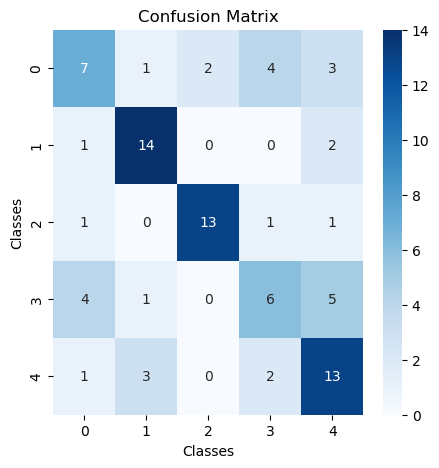

In [ ]:
print("Confusion Matrix for this fold:")
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()



In [ ]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.74      0.82      0.78        17
           2       0.87      0.81      0.84        16
           3       0.46      0.38      0.41        16
           4       0.54      0.68      0.60        19

    accuracy                           0.62        85
   macro avg       0.62      0.62      0.62        85
weighted avg       0.62      0.62      0.62        85



Multi-layer Perceptron

For this, I have scaled the data using StandardScaler


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()


In [38]:
scaler.fit(train)

StandardScaler()

In [39]:
train.describe()

,FG%,3P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.440553,0.287606,0.499820,0.710385,0.851111,2.832281,3.678947,1.966667,0.641520,0.426901,1.162807,1.713567,8.855322
std,0.111796,0.165049,0.122493,0.215041,0.783148,1.849131,2.464521,1.893555,0.436958,0.453223,0.837078,0.787016,6.351552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.231000,0.464000,0.651000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.600000,1.200000,4.000000
50%,0.441000,0.333000,0.506000,0.759000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,1.000000,1.800000,7.300000
75%,0.493000,0.384500,0.556000,0.833500,1.200000,3.800000,5.000000,2.500000,0.900000,0.600000,1.500000,2.250000,12.450000
max,1.000000,1.000000,1.500000,1.000000,4.900000,10.300000,14.800000,11.800000,2.100000,3.700000,5.000000,6.000000,32.800000


Multi-layer Perceptron

In [41]:
from sklearn.neural_network import MLPClassifier

In [43]:
train.notna().count()

FG%     855
3P%     855
eFG%    855
FT%     855
ORB     855
DRB     855
TRB     855
AST     855
STL     855
BLK     855
TOV     855
PF      855
PTS     855
dtype: int64

In [44]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [770, 684]

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)